<a href="https://colab.research.google.com/github/tamer017/ML-Assessments/blob/master/Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 

Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from scipy.spatial.distance import cdist
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from scipy.stats import normaltest, zscore
from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from operator import itemgetter
%matplotlib inline

In [2]:
plt.figure(figsize=(16,8))
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, method = [], num_clusters = 0,kmean = False):
    # color = ["blue","orange","green","red","purple","brown","pink","gray","olive","cyan","yellow","black","lime","magenta"]  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
      sns.scatterplot(X[:, 0], X[:, 1], hue=np.zeros((X.shape[0],)), legend='full',palette="Set1")  
    else:
      labels = method.labels_
      if (num_clusters > 45):
        sns.scatterplot(X[:, 0], X[:, 1], hue=labels,palette="Set1").legend_.remove() 
      else: 
        sns.scatterplot(X[:, 0], X[:, 1], hue=labels, legend='auto',palette="Set1")  
        # plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,ncol=3)
      if (kmean):
        for i in range(num_clusters):
            plt.scatter(method.cluster_centers_[i][0], method.cluster_centers_[i][1], c = "black", marker = 'x', s = 100)   
  
          

<Figure size 1152x576 with 0 Axes>

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



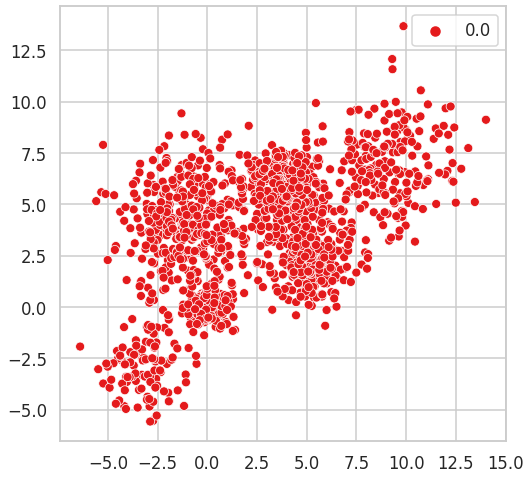

In [3]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [4]:
def K_mean(X, min_clusters = 2, max_clusters = 20): 
  distortion_functions = []
  silhouette_scores = []
  inertias = []
  for n_clusters in range(min_clusters, max_clusters+1):
      Kmean = KMeans(n_clusters = n_clusters)
      Kmean.fit(X)
      if X.shape[1] == 2:
        display_cluster(X, method = Kmean, num_clusters = n_clusters,kmean = True)
      distortion_function = sum(np.min(cdist(X, Kmean.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
      inertia = Kmean.inertia_ 
      inertias.append(inertia)
      distortion_functions.append(distortion_function) 
      silhouette_scoree = silhouette_score(X, Kmean.labels_)
      silhouette_scores.append(silhouette_scoree)
      print("For", n_clusters, "clusters,", "the average silhouette_score is :", silhouette_scoree, ", the destortion function is :", distortion_function, ",and inertia is :",inertia)
      plt.show()
  plt.figure(figsize=(16,8))
  plt.plot(list(range(min_clusters,max_clusters+1)), distortion_functions, 'bx-')
  plt.xlabel('k (number of clusters)')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method for distortion showing the optimal k')
  plt.xticks(range(min_clusters,max_clusters+1))
  plt.show()
  plt.figure(figsize=(16,8))
  plt.plot(list(range(min_clusters,max_clusters+1)), inertias, 'bx-')
  plt.xlabel('k (number of clusters)')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method for inertia showing the optimal k')
  plt.xticks(range(min_clusters,max_clusters+1))
  plt.show()
  plt.figure(figsize=(16,8))
  plt.plot(list(range(min_clusters,max_clusters+1)), silhouette_scores, 'bx-')
  plt.xlabel('k (number of clusters)')
  plt.ylabel('Silhouette score ')
  plt.title('The Elbow Method for silhouette score showing the optimal k')
  plt.xticks(range(min_clusters,max_clusters+1))
  plt.show()
  index, element = max(enumerate(silhouette_scores), key=itemgetter(1))
  max_silhouette_score_kmean = {"n_clusters":index+2,"silhouette_score":element}

For 2 clusters, the average silhouette_score is : 0.4751544541991239 , the destortion function is : 3.0298267196516098 ,and inertia is : 16716.66388210461


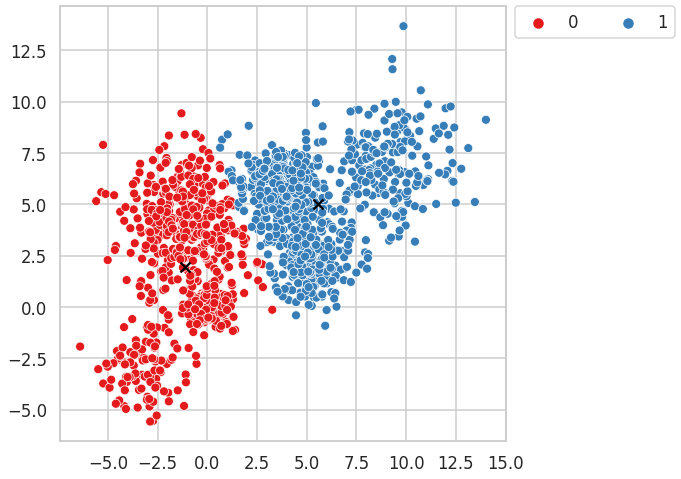

For 3 clusters, the average silhouette_score is : 0.43631793714185435 , the destortion function is : 2.5625763289944112 ,and inertia is : 12095.019396101474


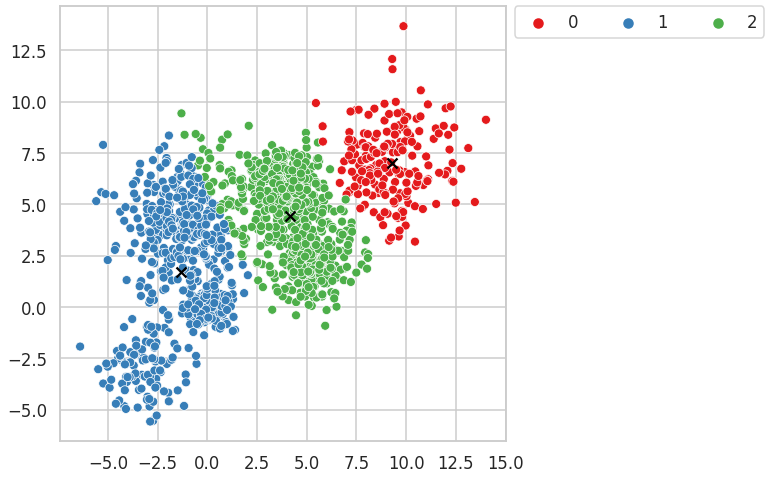

For 4 clusters, the average silhouette_score is : 0.46252115980886016 , the destortion function is : 2.106453622866393 ,and inertia is : 7812.236143775166


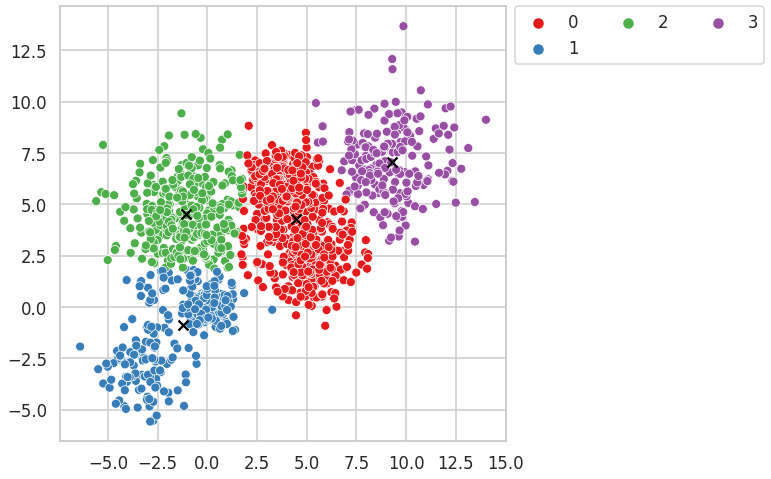

For 5 clusters, the average silhouette_score is : 0.48085813358066154 , the destortion function is : 1.7172971489976687 ,and inertia is : 5600.191496687573


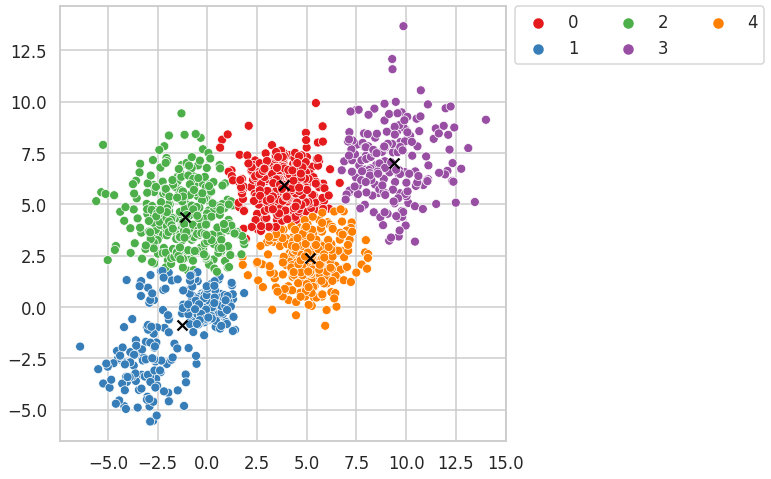

For 6 clusters, the average silhouette_score is : 0.48614459735646176 , the destortion function is : 1.5047001974366145 ,and inertia is : 4310.373960439337


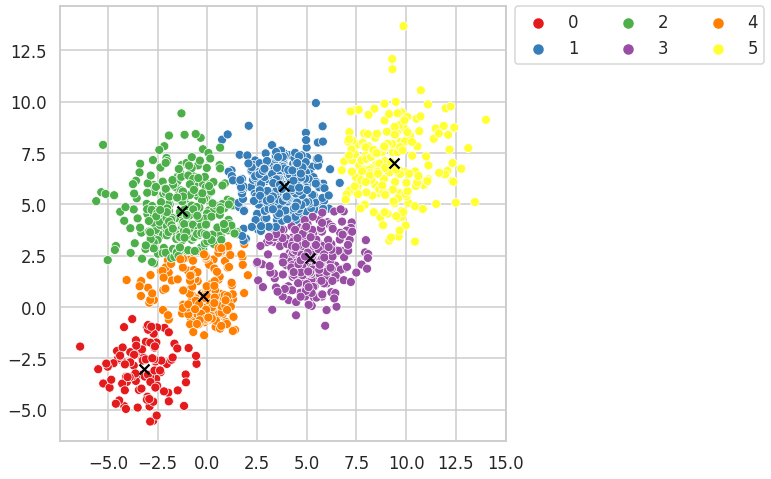

For 7 clusters, the average silhouette_score is : 0.46340972197949165 , the destortion function is : 1.4110078118049556 ,and inertia is : 3811.1633360756578


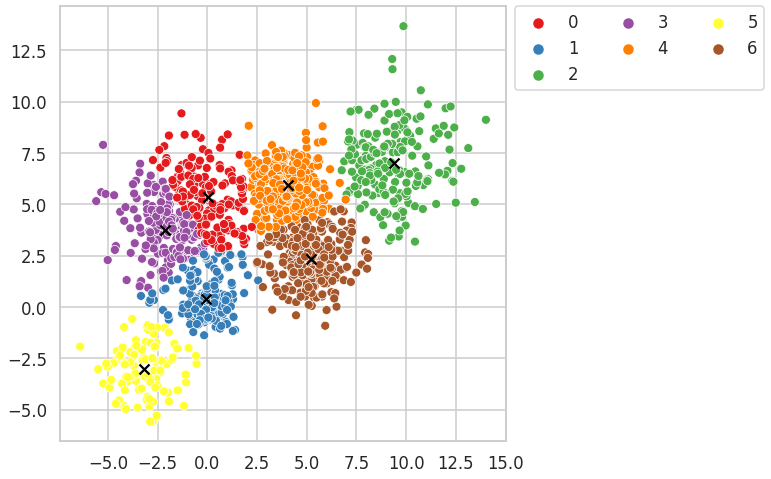

For 8 clusters, the average silhouette_score is : 0.4444601357188936 , the destortion function is : 1.3499443027129143 ,and inertia is : 3445.5420986614927


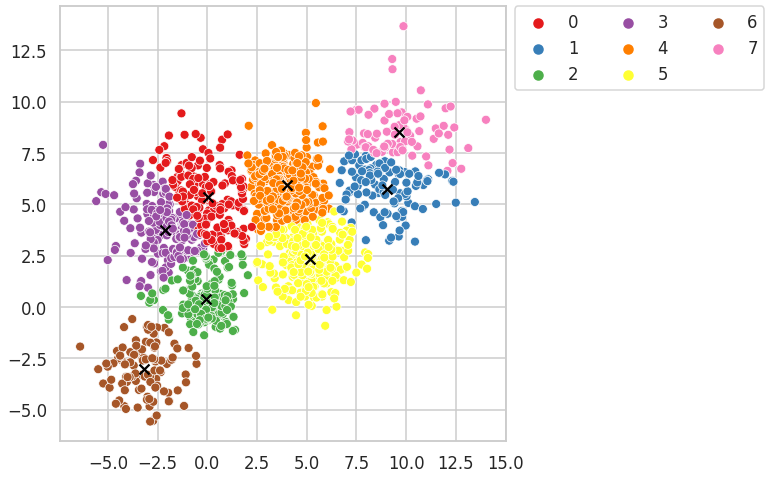

For 9 clusters, the average silhouette_score is : 0.45196759425110156 , the destortion function is : 1.2810362175572172 ,and inertia is : 3085.207971263273


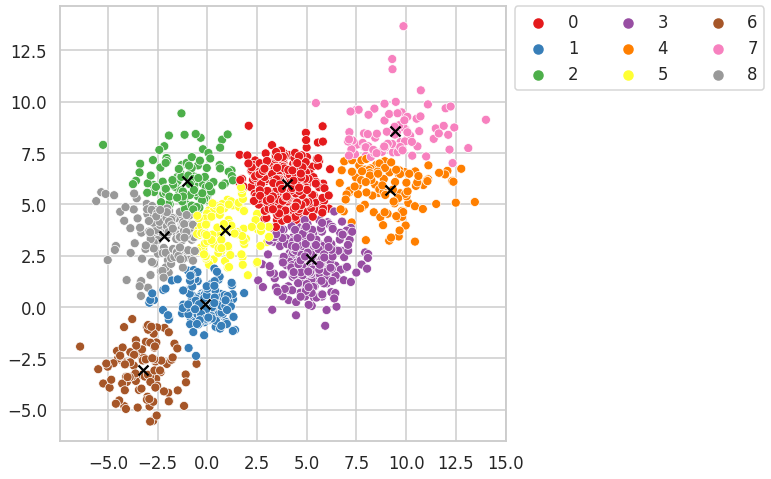

For 10 clusters, the average silhouette_score is : 0.39663471004349216 , the destortion function is : 1.2223345043832434 ,and inertia is : 2828.6113823720566


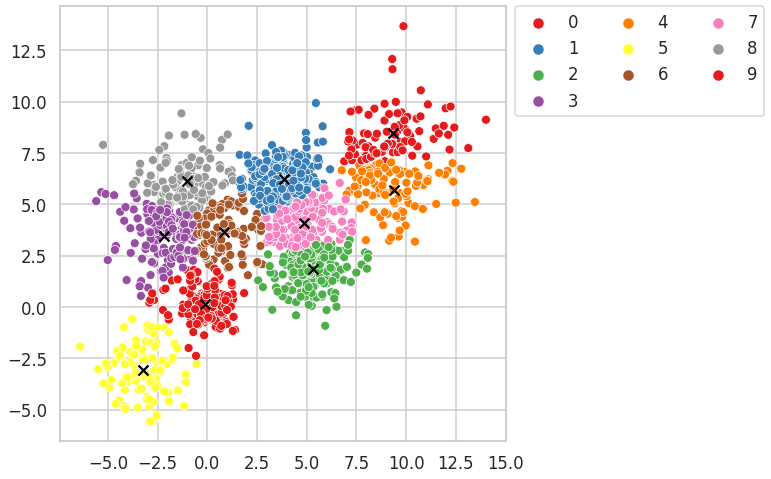

For 11 clusters, the average silhouette_score is : 0.4025565426637589 , the destortion function is : 1.1839248533649909 ,and inertia is : 2620.602553275011


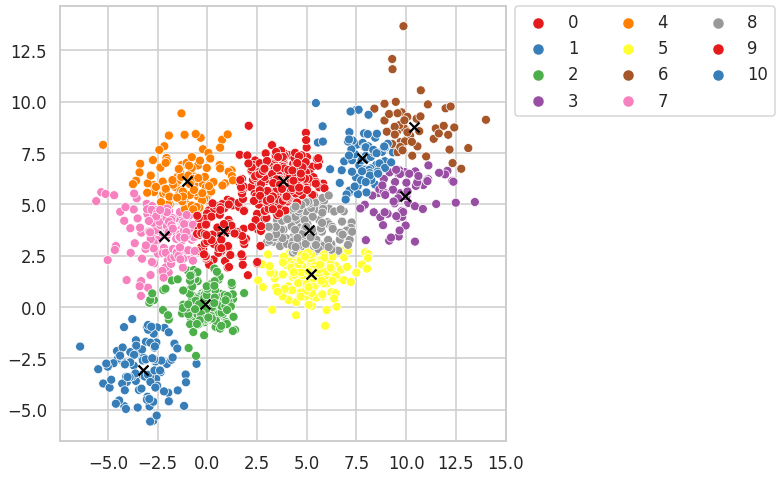

For 12 clusters, the average silhouette_score is : 0.37499589472021666 , the destortion function is : 1.1453111220304604 ,and inertia is : 2461.5338423251387


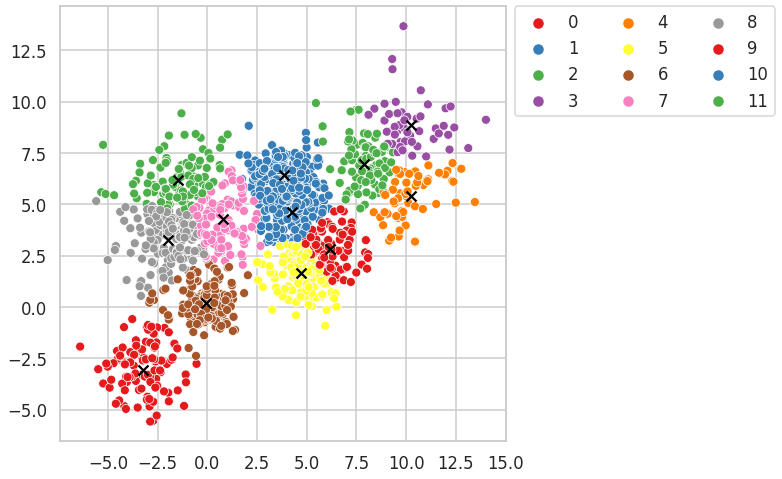

For 13 clusters, the average silhouette_score is : 0.3782360318212468 , the destortion function is : 1.1009224033831426 ,and inertia is : 2272.433516106553


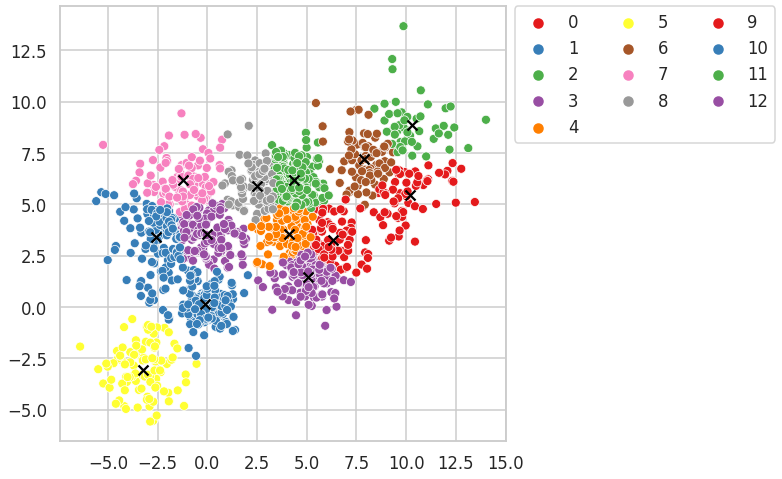

For 14 clusters, the average silhouette_score is : 0.3726498311201132 , the destortion function is : 1.0590034132280015 ,and inertia is : 2100.8039063470214


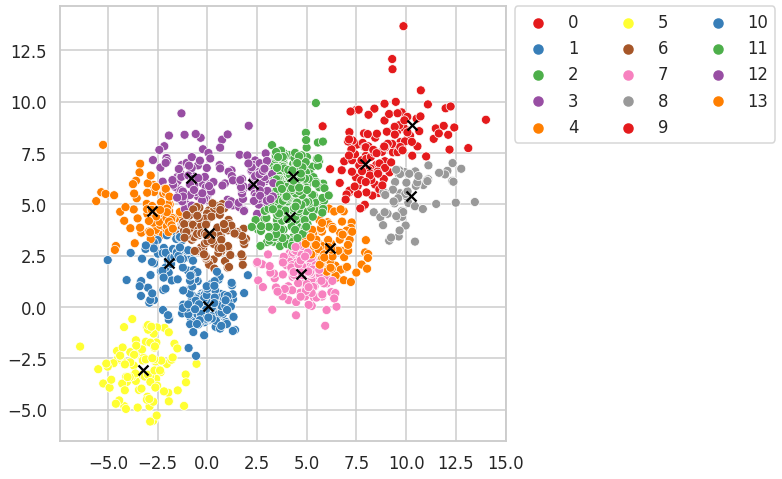

For 15 clusters, the average silhouette_score is : 0.35767973333318853 , the destortion function is : 1.0415792609988577 ,and inertia is : 2019.6221251549364


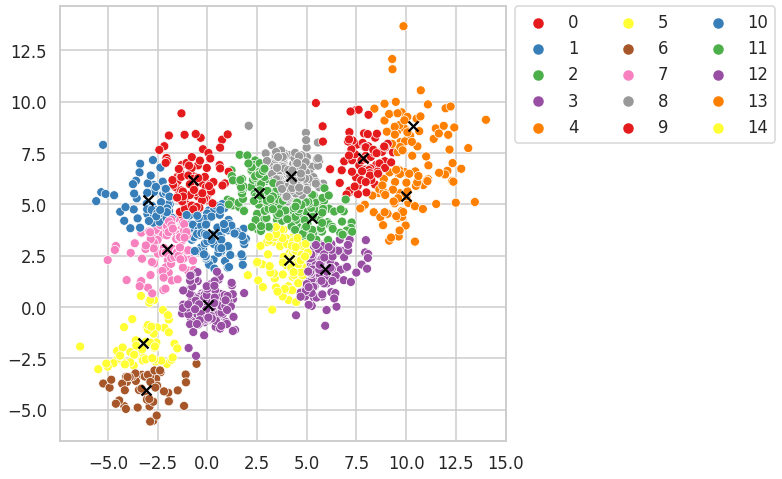

For 16 clusters, the average silhouette_score is : 0.35046609108900917 , the destortion function is : 1.0040324150400723 ,and inertia is : 1887.4171449767482


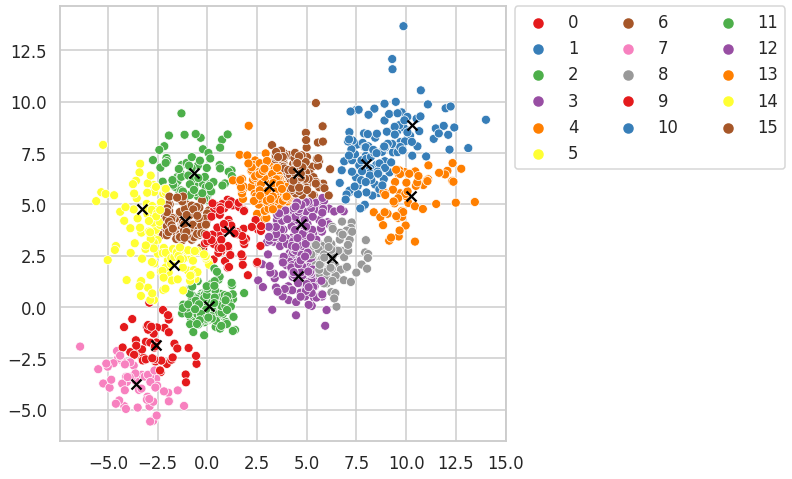

For 17 clusters, the average silhouette_score is : 0.3467984668877332 , the destortion function is : 0.9896556353221688 ,and inertia is : 1818.3625013355509


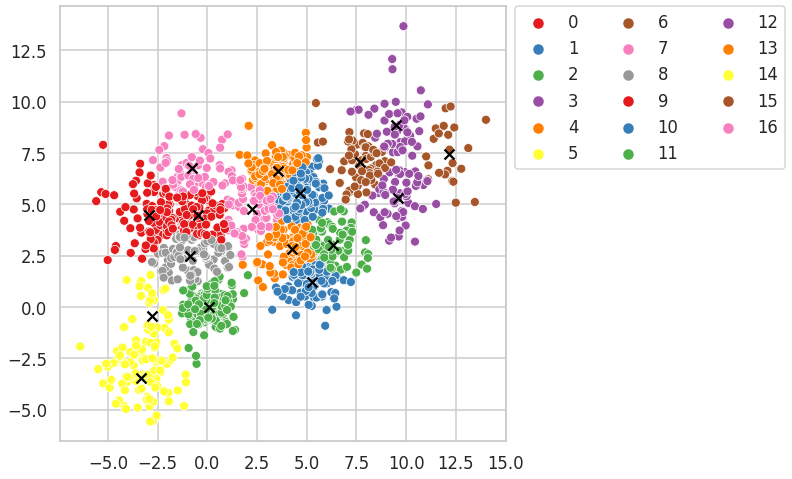

For 18 clusters, the average silhouette_score is : 0.3544649726574457 , the destortion function is : 0.9555656771405782 ,and inertia is : 1683.7001108269096


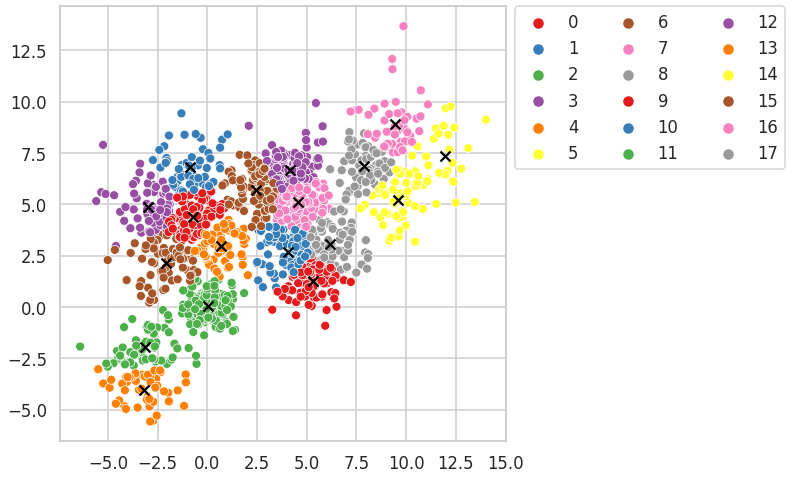

For 19 clusters, the average silhouette_score is : 0.34890524432931685 , the destortion function is : 0.9312703147827053 ,and inertia is : 1612.387934495235


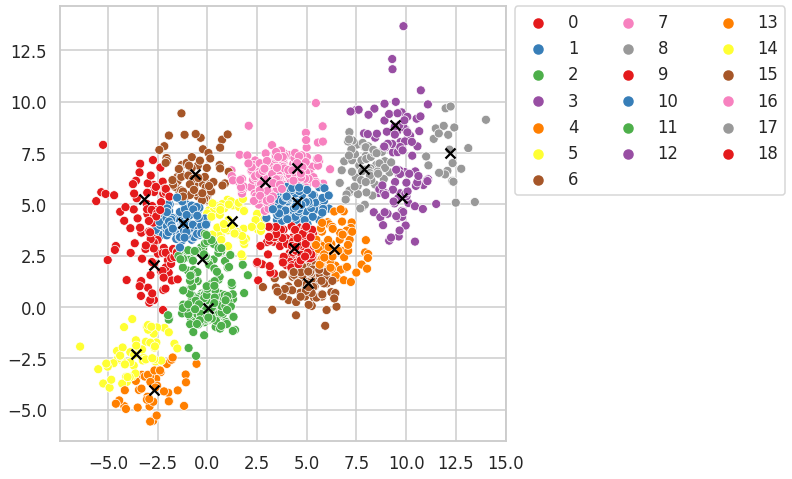

For 20 clusters, the average silhouette_score is : 0.3533244488397097 , the destortion function is : 0.9115235610969021 ,and inertia is : 1562.0712657019728


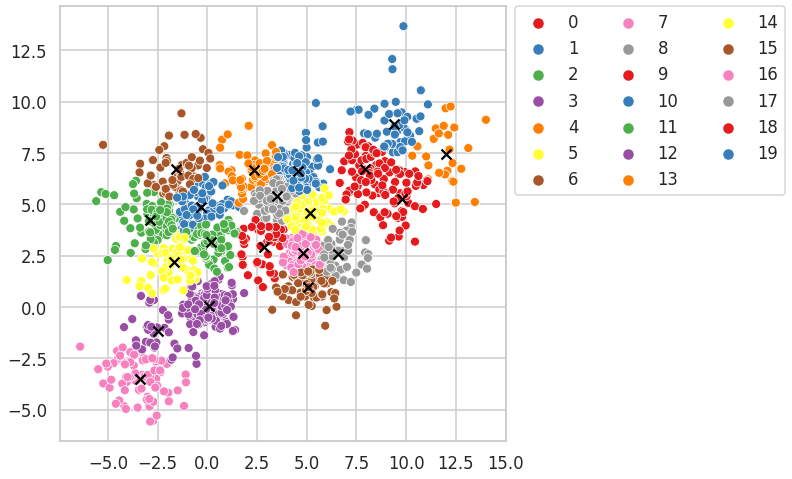

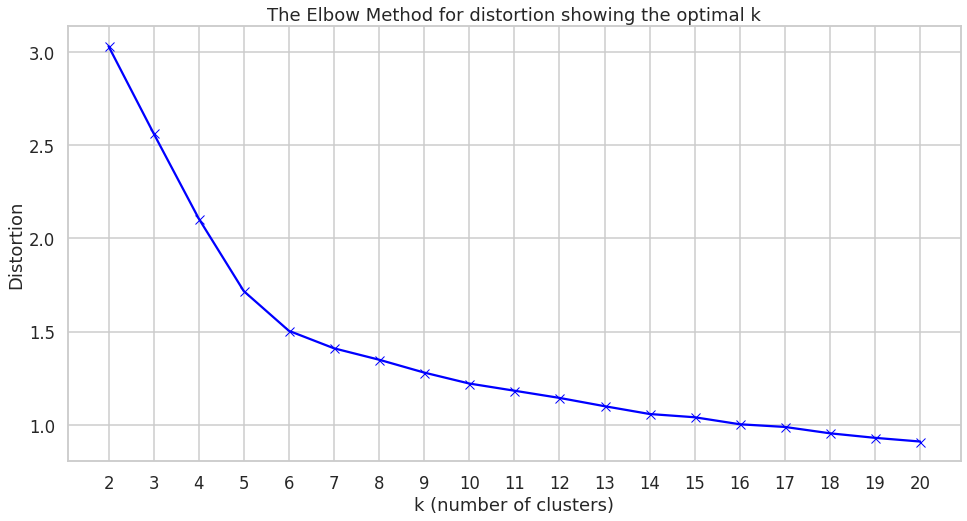

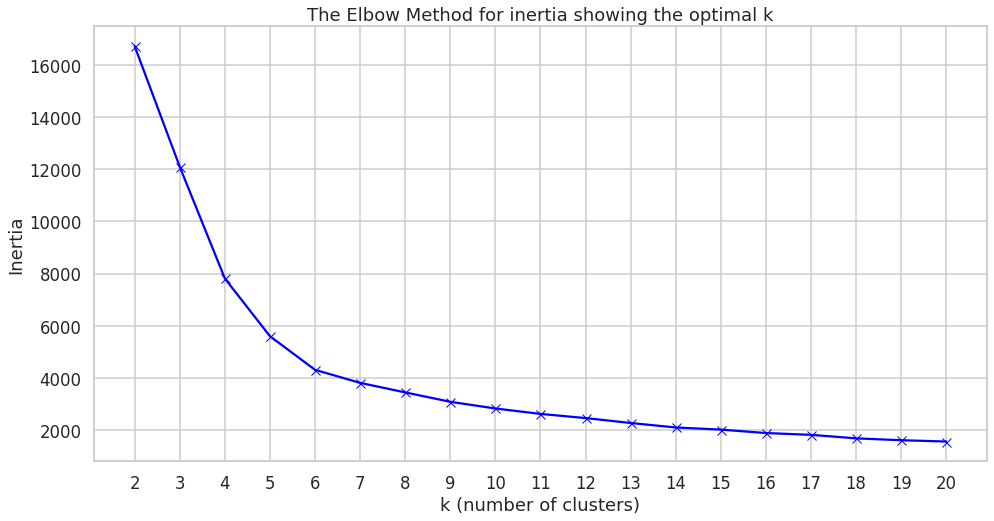

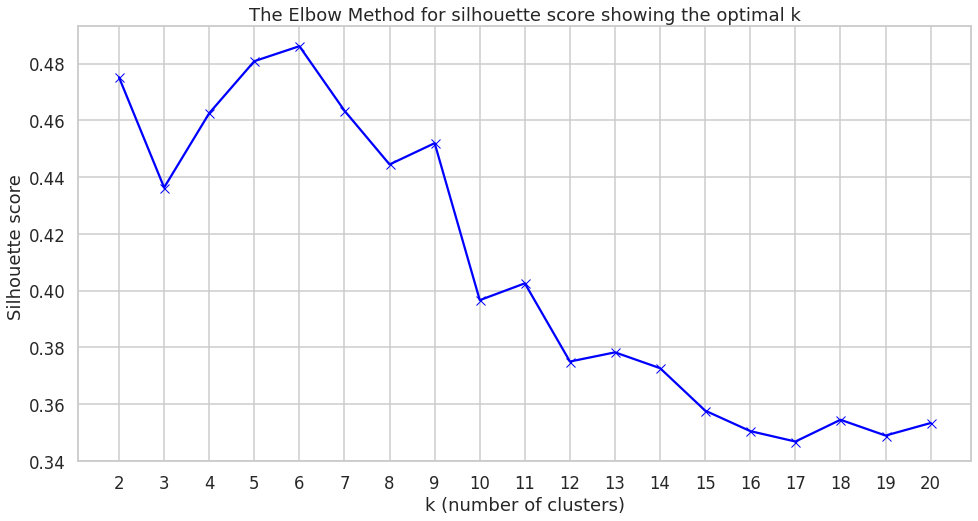

In [5]:
K_mean(Multi_blob_Data)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
X = Multi_blob_Data

# Define parameter combinations to try
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
distance_thresholds = [3,5,10,7,9,4]

# Initialize variables to store best results
best_silhouette_score = -1
best_params = {}

# Loop over all parameter combinations and perform clustering
for affinity in affinities:
    for linkage_method in linkages:
        for distance_threshold in distance_thresholds:
            # Initialize model with current parameters
            model = AgglomerativeClustering(n_clusters=None, 
                                             affinity=affinity, 
                                             linkage=linkage_method,
                                             distance_threshold=distance_threshold)
            model.fit(X)
            n_clusters = np.unique(model.labels_).shape[0]
            if X.shape[1] == 2:
              display_cluster(X, method = model, num_clusters = n_clusters)
            if (n_clusters > 1):
              # Calculate the silhouette score
              silhouette_avg = silhouette_score(X, model.labels_)
              print("The number of clusters is :",np.unique(model.labels_).shape[0],"clusters")
              print(f"Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}")
              print(f"Silhouette Score: {silhouette_avg:.2f}")

              # If the current score is better than the previous best score, update the variables
              if silhouette_avg > best_silhouette_score:
                  best_silhouette_score = silhouette_avg
                  best_params = {'affinity': affinity, 'linkage': linkage_method, 'distance_threshold': distance_threshold,"nuber of clusters" : n_clusters}

              # Plot the dendrogram
              linkage_matrix = linkage(model.children_, method=linkage_method)
              plt.figure(figsize=(12, 5))
              plt.title(f"Dendrogram ({affinity}, {linkage_method})\nSilhouette Score: {silhouette_avg:.2f}")
              dendrogram(linkage_matrix,)
              plt.show()
            else:
              print("distance threshold :",distance_threshold,", linkage methode :",linkage_method,", and affinity :",affinity,"produces only one cluster")
    
            print("-----------------------------------------------------------------------------------------------------")


print(f"\nBest Silhouette Score: {best_silhouette_score:.2f}")
print(f"Best Parameters: {best_params}")


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [ ]:
import matplotlib.pyplot as plt
X = Multi_blob_Data

eps_values = np.linspace(0.1, 3, 30)
min_samples_values = np.arange(5, 26)

silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))
best_silhouette_score = 0
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        n_clusters = len(set(dbscan.labels_))
        if n_clusters > 1:
            silhouette_scores[i][j] = silhouette_score(X, dbscan.labels_)
            print(f"Minimum number of samples : {min_samples:.2f}, and epsilon: {eps:.2f} produces {n_clusters} clusters with silhouette score : {silhouette_scores[i][j]:.2f}")
            # If the current score is better than the previous best score, update the variables
            if silhouette_scores[i][j] > best_silhouette_score:
                best_silhouette_score = silhouette_scores[i][j]
                best_params = {'min_samples': min_samples, 'eps': eps,"n_clusters" : n_clusters}
            if X.shape[1] == 2:
              display_cluster(X, method = dbscan, num_clusters = n_clusters)
        else:
            print(f"Minimum number of samples : {min_samples:.2f}, and epsilon: {eps:.2f} produces only one cluster")
        print("-----------------------------------------------------------------------------------------------------")
plt.figure(figsize=(10, 7))
plt.imshow(silhouette_scores.T, cmap='hot', origin='lower', extent=[0.1, 3, 5, 25])
plt.colorbar()
plt.xlabel('eps')
plt.ylabel('min_samples')
plt.title('Silhouette Score for Different Values of eps and min_samples')
plt.show()
print(f"\nBest Silhouette Score: {best_silhouette_score:.2f}")
print(f"Best Parameters: {best_params}")


Minimum number of samples : 5.00, and epsilon: 0.10 produces 12 clusters with silhouette score : -0.54
-----------------------------------------------------------------------------------------------------
Minimum number of samples : 6.00, and epsilon: 0.10 produces 5 clusters with silhouette score : -0.50
-----------------------------------------------------------------------------------------------------
Minimum number of samples : 7.00, and epsilon: 0.10 produces only one cluster
-----------------------------------------------------------------------------------------------------
Minimum number of samples : 8.00, and epsilon: 0.10 produces only one cluster
-----------------------------------------------------------------------------------------------------
Minimum number of samples : 9.00, and epsilon: 0.10 produces only one cluster
-----------------------------------------------------------------------------------------------------
Minimum number of samples : 10.00, and epsilon: 0.1

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [42]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(iris_data.data)


In [ ]:
K_mean(scaled_data)

In [26]:
'''
  Remove outliers using zscore with normal distribution with threshold (EX:- 3).
'''
def get_zscore(df, col, threshold):
  z = np.abs(zscore(df[col]))
  filtered_entries = z < threshold
  filtered_df = df[filtered_entries]
  return filtered_df
'''
  Remove outliers using IQR with non-normal distribution with threshold (EX:- 1.5).
'''
def get_IQR(df, col, threshold):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  cut_off = IQR * threshold
  lower = Q1 - cut_off
  upper =  Q3 + cut_off
  filtered_df = df[(df[col] < upper)&(df[col] > lower)]
  if IQR == 0:
    return df,IQR
  return filtered_df, IQR

'''
  Outliers Exploration using BoxPlot, ViolinPlot, HistPlot, and KdePlot.
'''
def outliers_plot(df, col, state):
  fig, axes = plt.subplots(1, 4, figsize=(20, 5), dpi=100)
  #create chart in each subplot
  fig.suptitle(str(col) + " " + state + " removing the outliers")
  sns.boxplot(data=df, x=col, ax=axes[0])
  sns.violinplot(data=df, x=col, ax=axes[1])
  sns.histplot(data=df[col], ax=axes[2], bins=30)
  axes[2].set_yscale('log')
  sns.kdeplot(data=df[col], ax=axes[3])
  # axes[3].set_yscale('log')

'''
  Remove the outliers from the numerical features using zscore or IQR depending on the 
  distribution of the data which can be checked using normaltest that test whether
  a sample differs from a normal distribution.
  This function tests the null hypothesis that a sample comes from a normal 
  distribution. It is based on D’Agostino and Pearson’s [1], [2] test that combines 
  skew and kurtosis to produce an omnibus test of normality.
  This method return A 2-sided chi squared probability p for the hypothesis test.
  If p > 0.05 then the distribution is normal otherwise the distribution is not
  normal.
  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

'''
def remove_outliers (df, numerical_columns_names):
  spatial_data = ['location_easting_osgr','location_northing_osgr','longitude','latitude']
  filtered_df = df.copy()
  for col in numerical_columns_names:
    if (col not in spatial_data):
      stat , p = normaltest(filtered_df[col])
      outliers_plot(filtered_df, col, "before")
      if p > 0.05:
        print(col,':','probably normal dist')
        print(filtered_df.shape,col,"before removing the outlier")
        filtered_df = get_zscore(filtered_df, col, 3)
        print(filtered_df.shape,col,"after removing the outlier")
      else:
        # if IQR = zero >> zscore, else >> IQR
        print(col,':','probably  not normal dist')
        print(filtered_df.shape,col,"before removing the outlier")
        filtered_df, IQR = get_IQR(filtered_df, col, 1.5)
        print(filtered_df.shape,col,"after removing the outlier")
        # which means that most of the values of the features have the same value 
        # and the Q1 and Q2 are the same.
        if IQR == 0: 
          print("IQR == 0 so we used zscoe")
          print(filtered_df.shape,col,"before removing the outlier")
          filtered_df = get_zscore(filtered_df, col, 3)
          print(filtered_df.shape,col,"after removing the outlier")
      outliers_plot(filtered_df, col, "after")
  return filtered_df


sepal length (cm) : probably normal dist
(150, 4) sepal length (cm) before removing the outlier
(150, 4) sepal length (cm) after removing the outlier
sepal width (cm) : probably normal dist
(150, 4) sepal width (cm) before removing the outlier
(149, 4) sepal width (cm) after removing the outlier
petal length (cm) : probably  not normal dist
(149, 4) petal length (cm) before removing the outlier
(149, 4) petal length (cm) after removing the outlier
petal width (cm) : probably  not normal dist
(149, 4) petal width (cm) before removing the outlier
(149, 4) petal width (cm) after removing the outlier


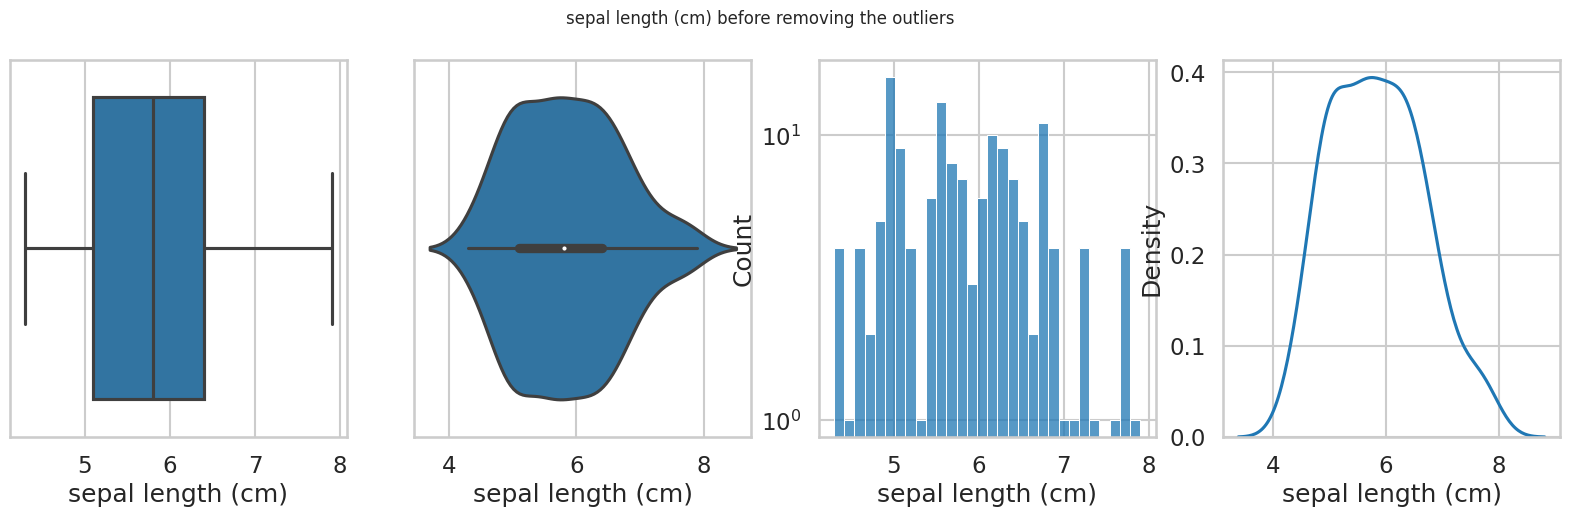

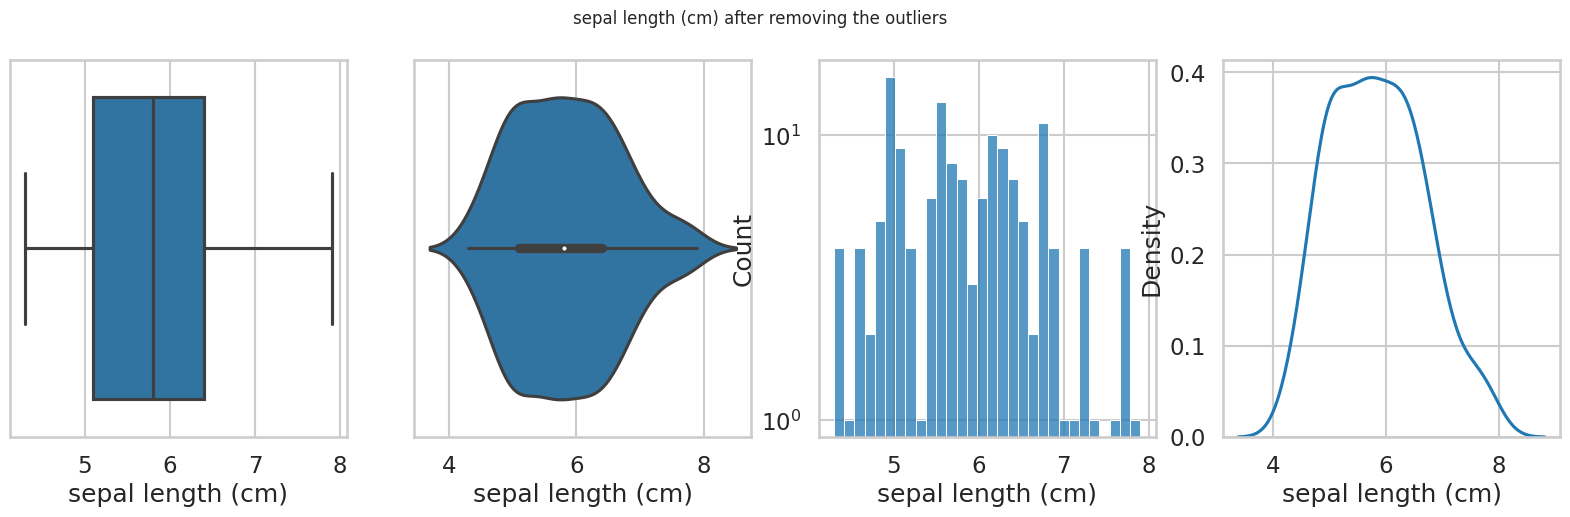

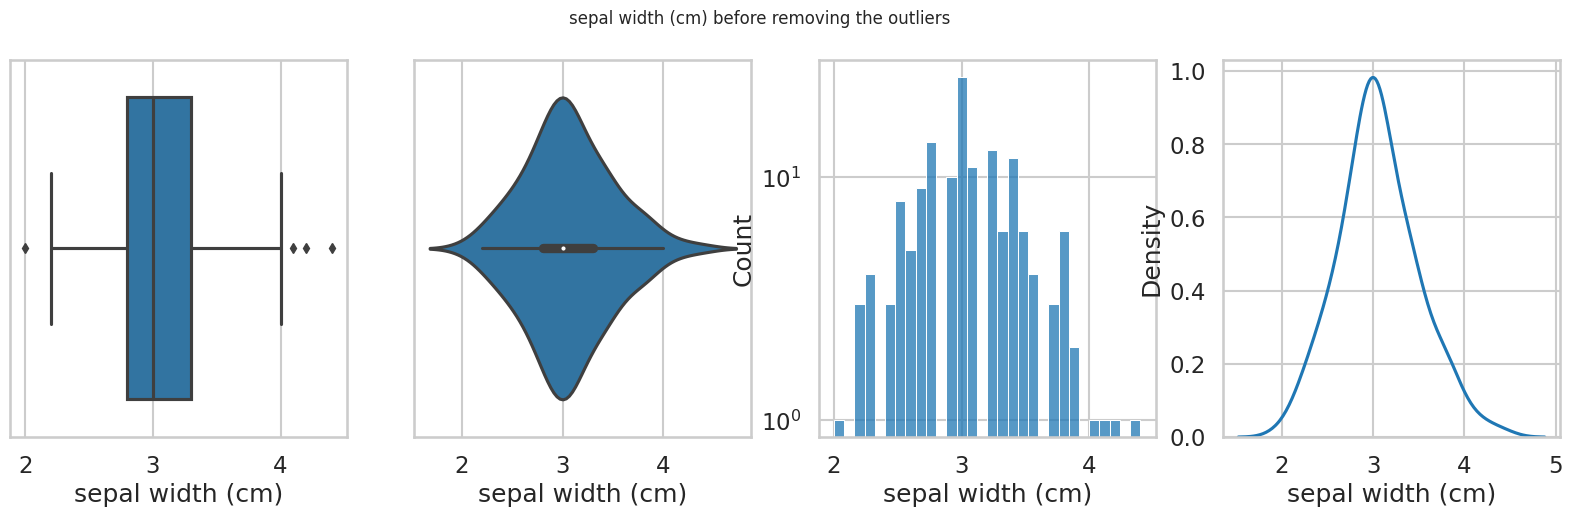

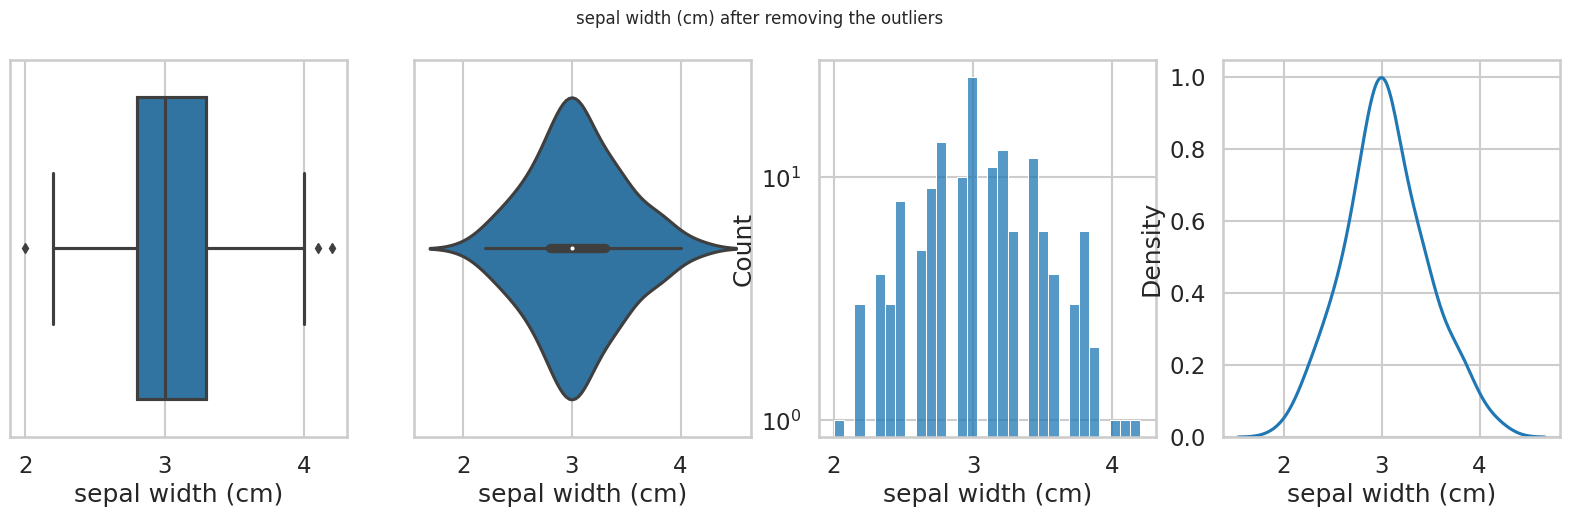

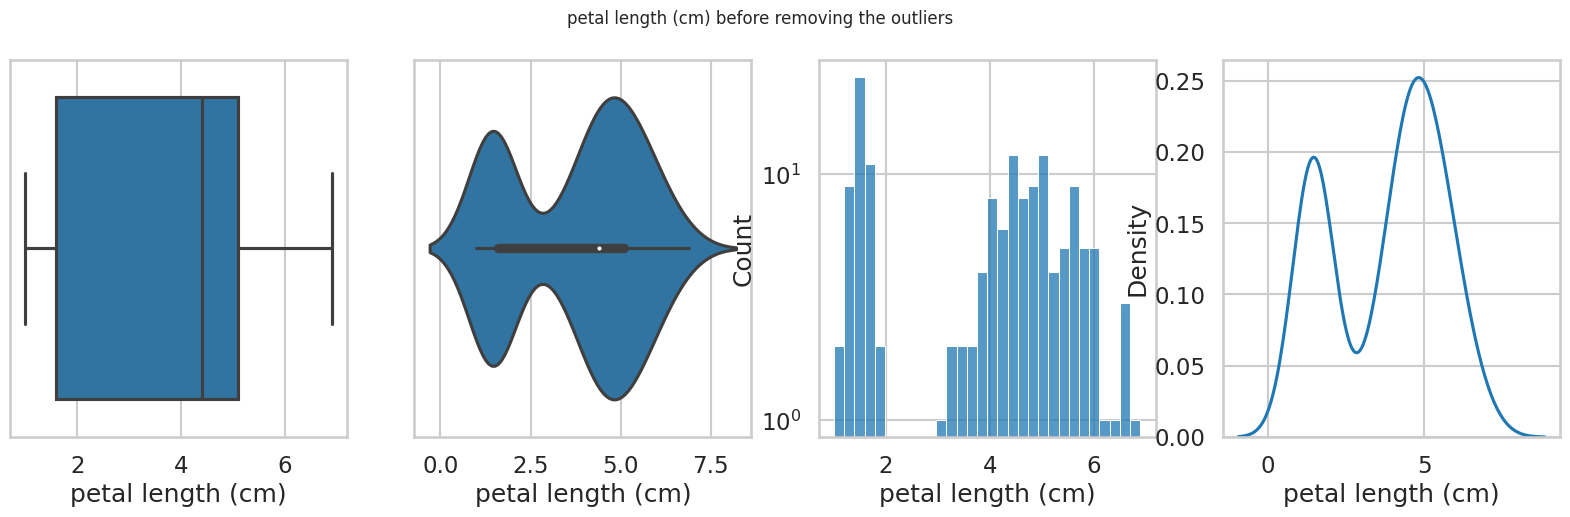

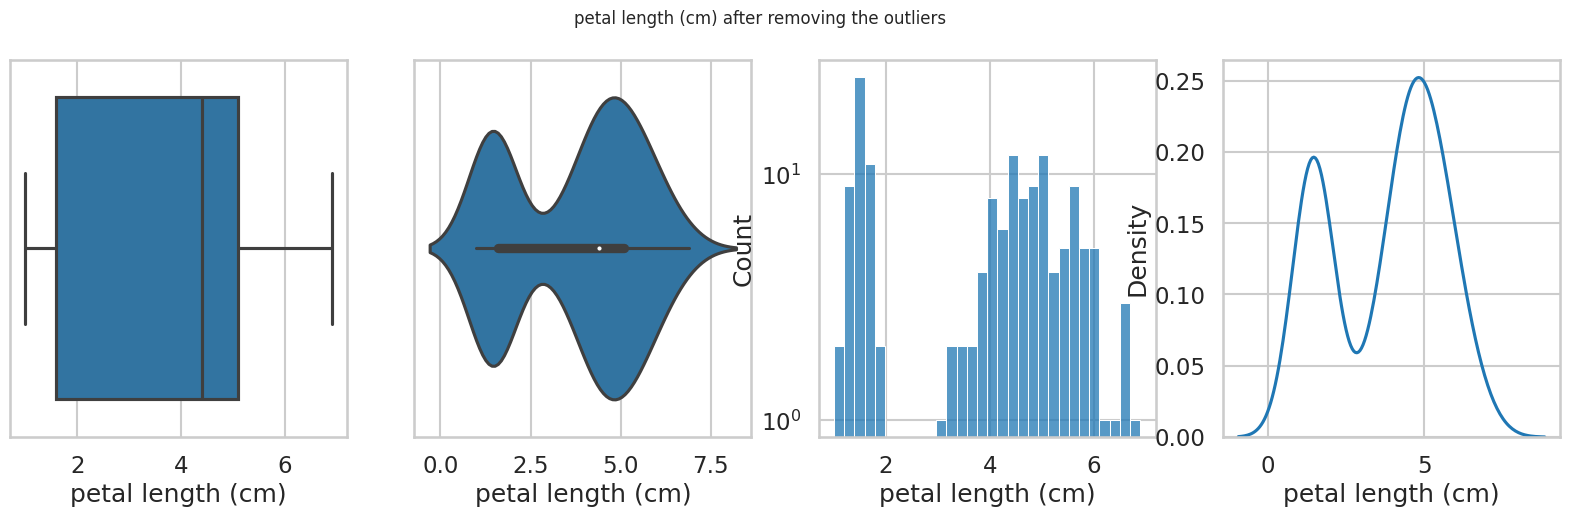

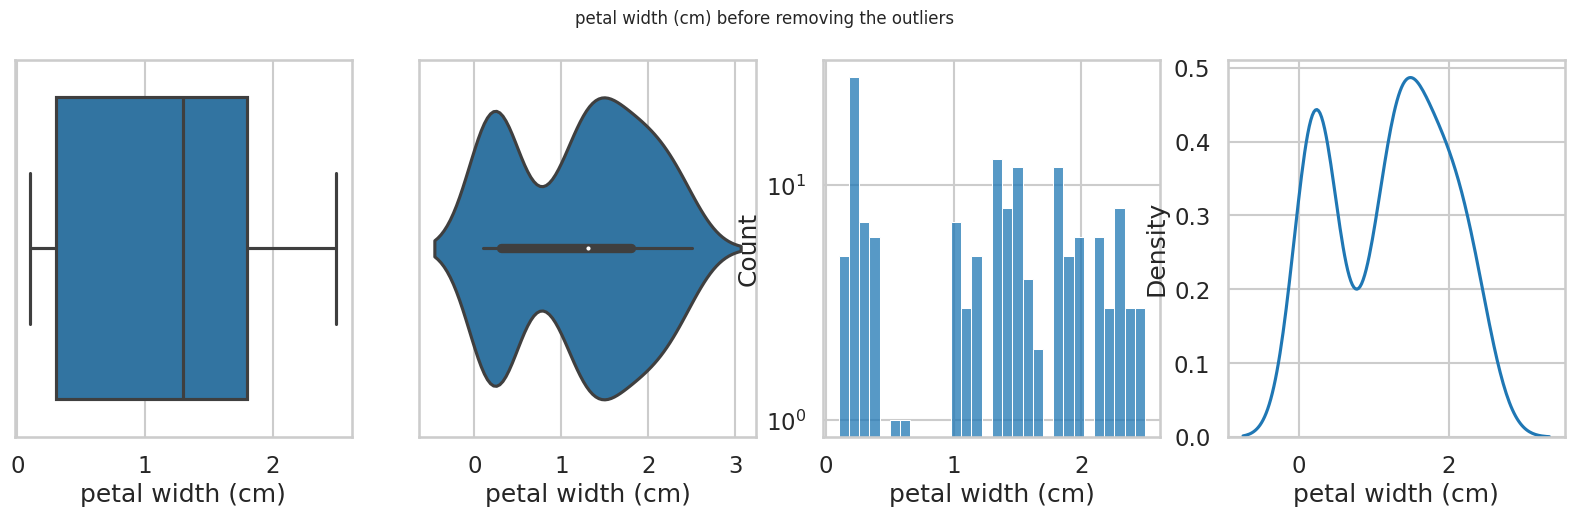

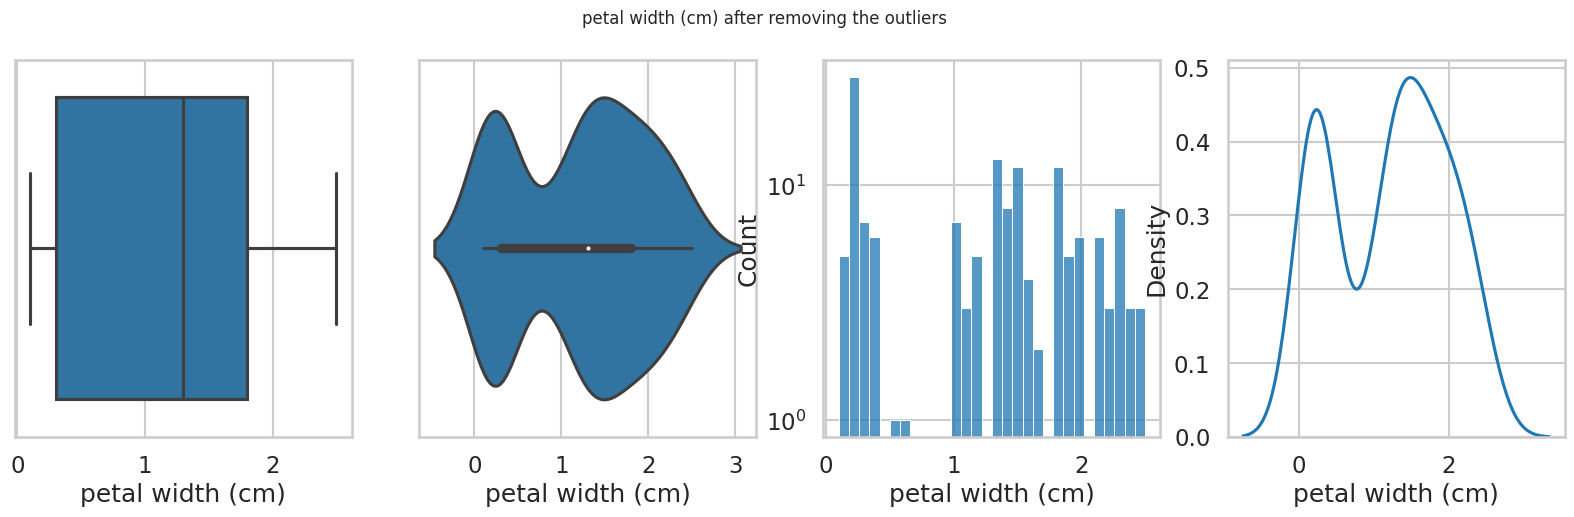

In [27]:
df = pd.DataFrame(iris_data.data,columns = iris_data.feature_names)
df = remove_outliers (df,df.columns)

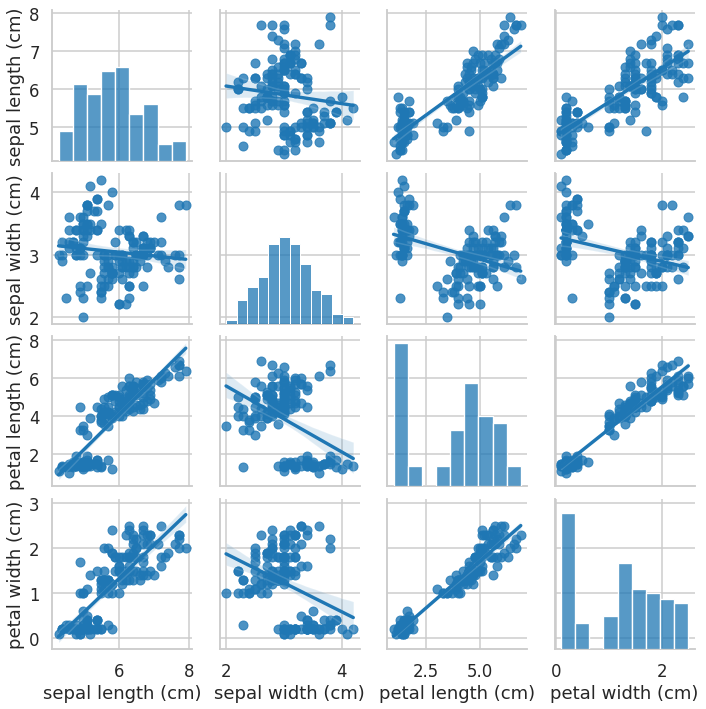

In [31]:
sns.pairplot(df, kind="reg")
plt.show()

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
# prepare transform on dataset
pca.fit(df)
# apply transform to dataset
transformed = pca.transform(df)
transformed

array([[-2.69833707,  0.3434171 ],
       [-2.73125249, -0.14974211],
       [-2.90567816, -0.12051186],
       [-2.76296455, -0.29481387],
       [-2.74276072,  0.34907606],
       [-2.2925661 ,  0.7598429 ],
       [-2.83666531, -0.0693658 ],
       [-2.64120183,  0.18702742],
       [-2.90542914, -0.55385626],
       [-2.68951281, -0.08691753],
       [-2.5194391 ,  0.6688687 ],
       [-2.62849023,  0.0362967 ],
       [-2.80353429, -0.20748257],
       [-3.24243628, -0.48579159],
       [-2.65441146,  1.20444695],
       [-2.63487954,  0.83149219],
       [-2.66248866,  0.33474836],
       [-2.21112409,  0.89567107],
       [-2.60088111,  0.53304052],
       [-2.32431158,  0.41683957],
       [-2.55704243,  0.45230362],
       [-3.23080769,  0.15508856],
       [-2.31807622,  0.11953759],
       [-2.37175515, -0.01744027],
       [-2.52366239, -0.11915755],
       [-2.48392664,  0.15177761],
       [-2.57632533,  0.39191398],
       [-2.65391342,  0.33775814],
       [-2.64894308,

2 : probably  not normal dist
(149, 2) 2 before removing the outlier
(149, 2) 2 after removing the outlier
4 : probably normal dist
(149, 2) 4 before removing the outlier
(149, 2) 4 after removing the outlier


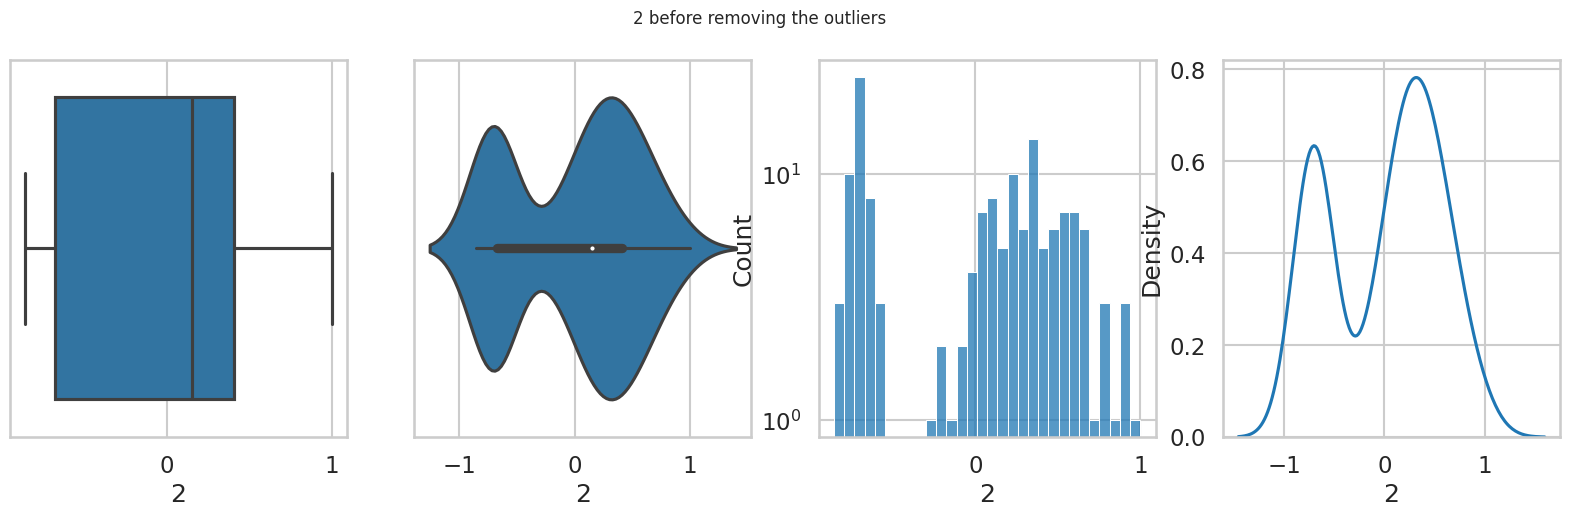

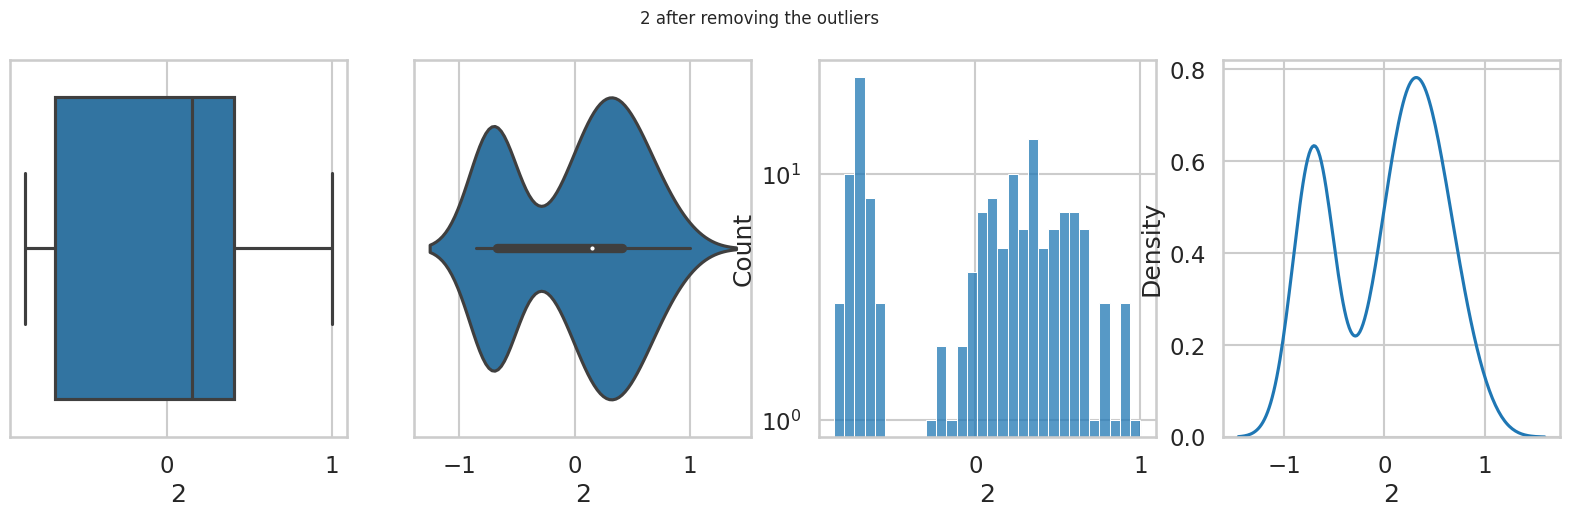

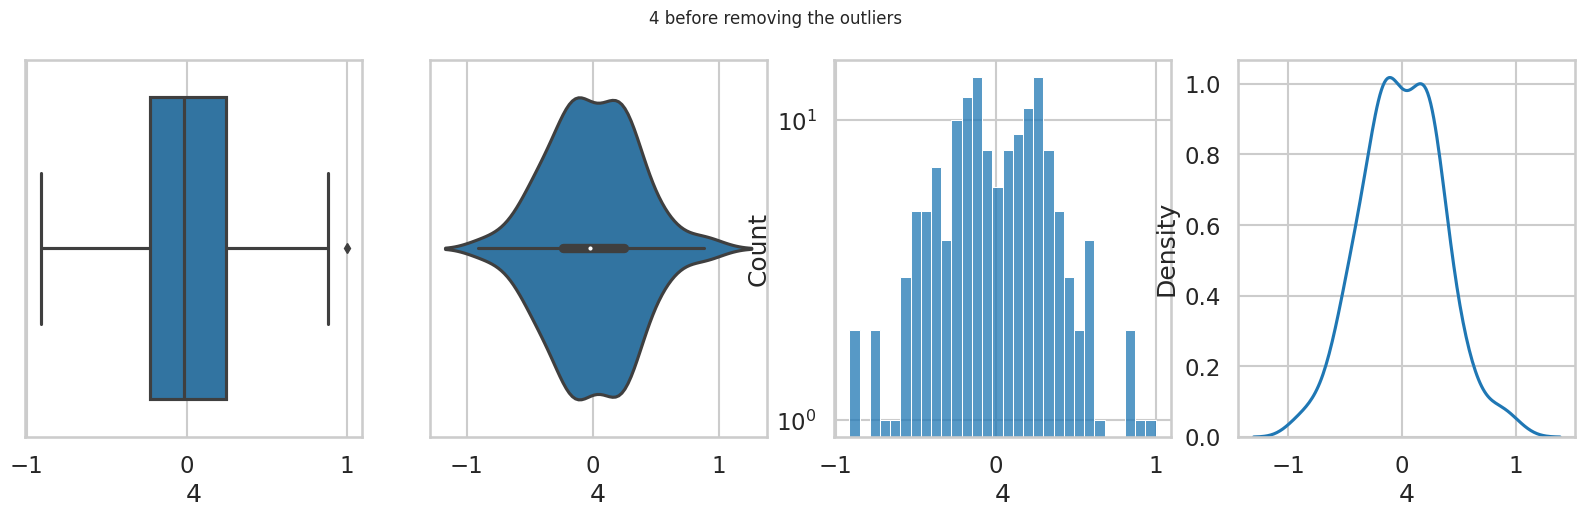

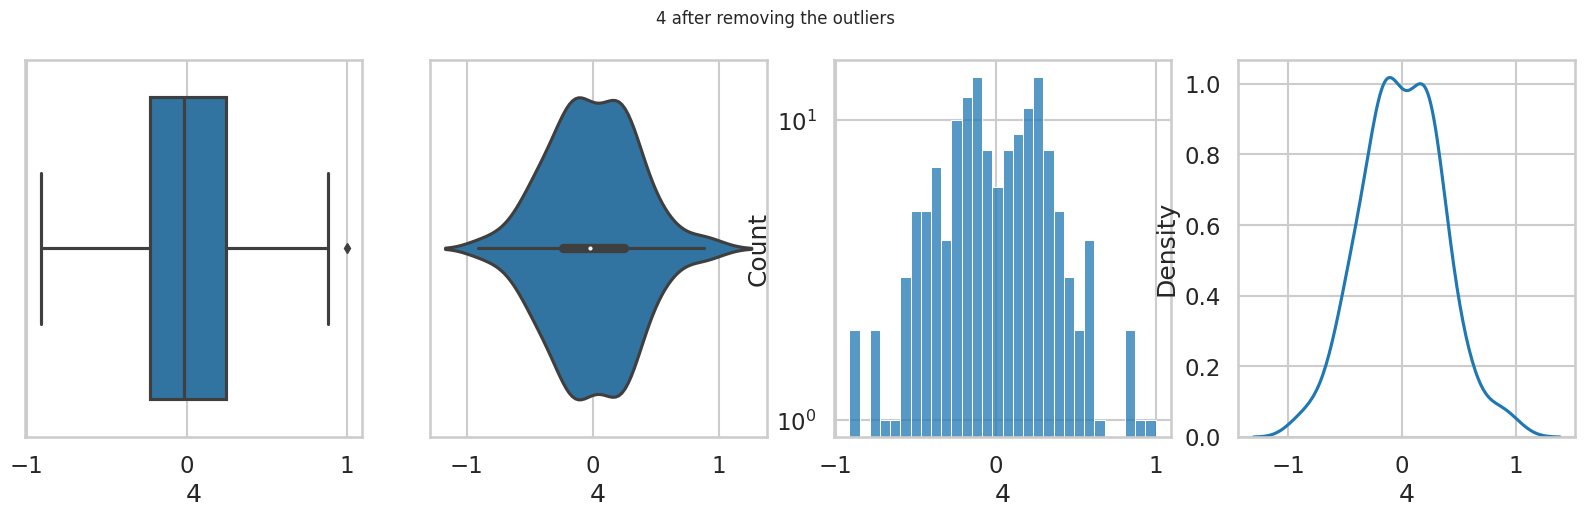

In [40]:
scaled_data = scaler.fit_transform(transformed)
df = pd.DataFrame(scaled_data,columns = ["2","4"])
df = remove_outliers (df,df.columns)

For 2 clusters, the average silhouette_score is : 0.7064877181967438 , the destortion function is : 0.7820457148643887 ,and inertia is : 135.65382263115657


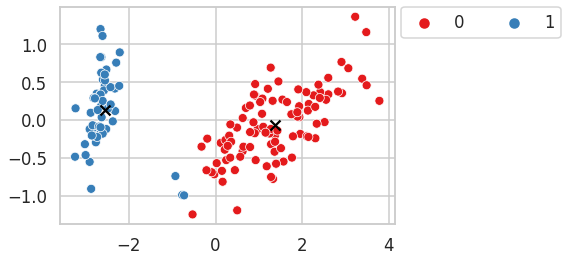

For 3 clusters, the average silhouette_score is : 0.5981919188236656 , the destortion function is : 0.553583681694574 ,and inertia is : 62.45919618273346


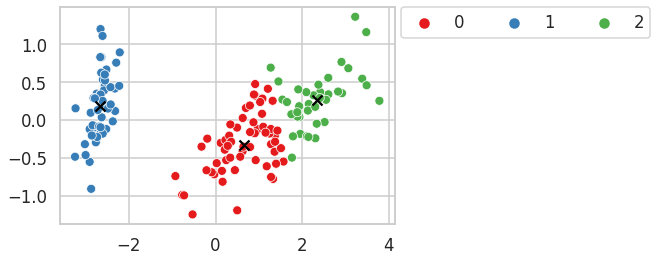

For 4 clusters, the average silhouette_score is : 0.5600008582184935 , the destortion function is : 0.46313216824045655 ,and inertia is : 40.89248972814576


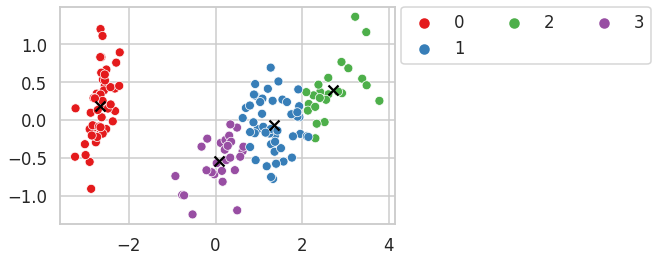

For 5 clusters, the average silhouette_score is : 0.5521112156385531 , the destortion function is : 0.4086064158690596 ,and inertia is : 32.08650391077471


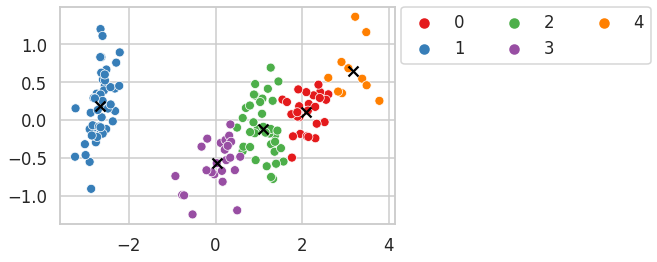

For 6 clusters, the average silhouette_score is : 0.4481608053601285 , the destortion function is : 0.35947943074899985 ,and inertia is : 25.45888522532854


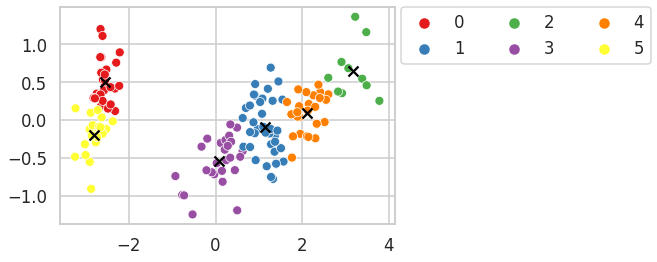

For 7 clusters, the average silhouette_score is : 0.4444219845208611 , the destortion function is : 0.32633010518978284 ,and inertia is : 21.322777182984392


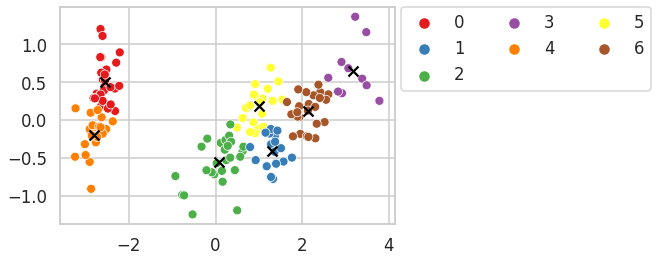

For 8 clusters, the average silhouette_score is : 0.4553983919542534 , the destortion function is : 0.2990329971505152 ,and inertia is : 17.236344660354913


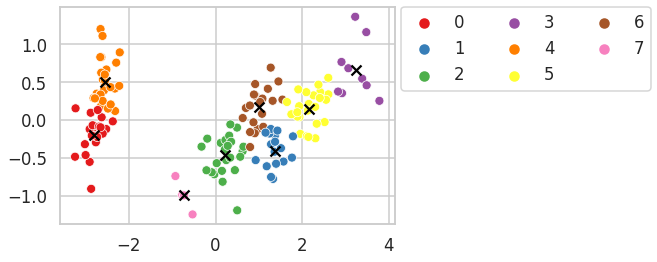

For 9 clusters, the average silhouette_score is : 0.4370038706151901 , the destortion function is : 0.2835734577627524 ,and inertia is : 15.49221265514786


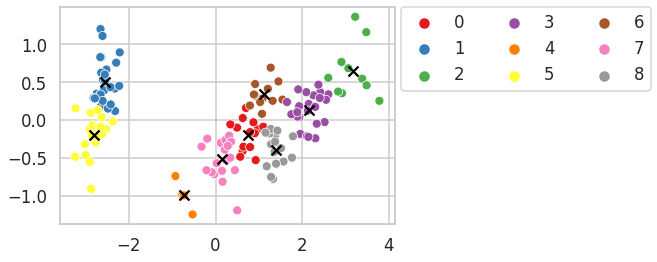

For 10 clusters, the average silhouette_score is : 0.41708640647419926 , the destortion function is : 0.26566394760094686 ,and inertia is : 13.603721687771788


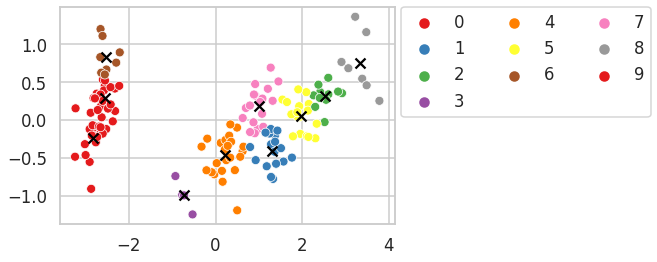

For 11 clusters, the average silhouette_score is : 0.3964911874021664 , the destortion function is : 0.25261506494628827 ,and inertia is : 12.027731161653099


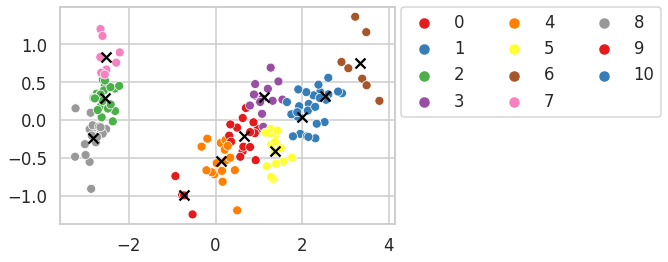

For 12 clusters, the average silhouette_score is : 0.38248493508295983 , the destortion function is : 0.2381170213437286 ,and inertia is : 11.34262751149917


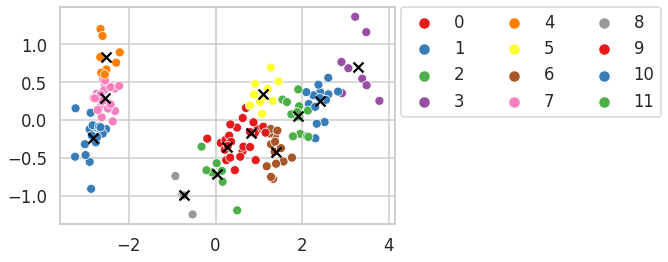

For 13 clusters, the average silhouette_score is : 0.3796256656143902 , the destortion function is : 0.23062792079365668 ,and inertia is : 10.333366605607257


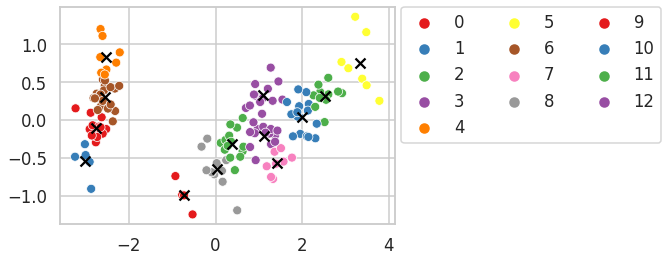

For 14 clusters, the average silhouette_score is : 0.3879734158980331 , the destortion function is : 0.22369497745358993 ,and inertia is : 9.566727101119344


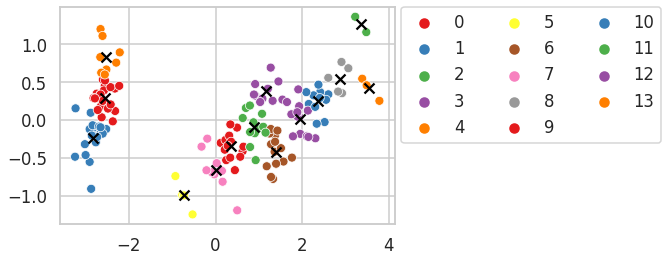

For 15 clusters, the average silhouette_score is : 0.3842082873884497 , the destortion function is : 0.21435875327292925 ,and inertia is : 8.82798111825318


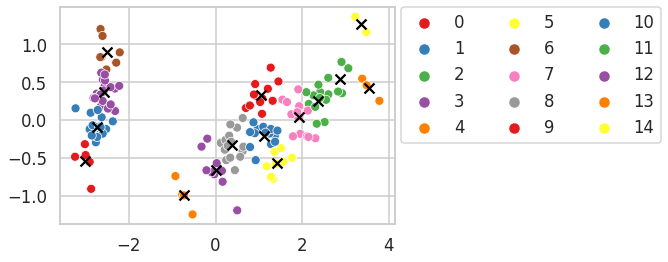

For 16 clusters, the average silhouette_score is : 0.37323705043020355 , the destortion function is : 0.2057507565142569 ,and inertia is : 8.292131185279668


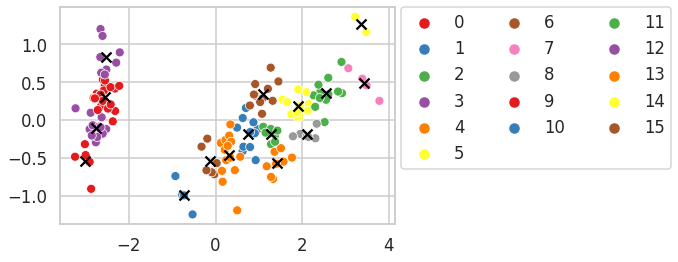

For 17 clusters, the average silhouette_score is : 0.38626058520985684 , the destortion function is : 0.20047616598948126 ,and inertia is : 7.6555479171114245


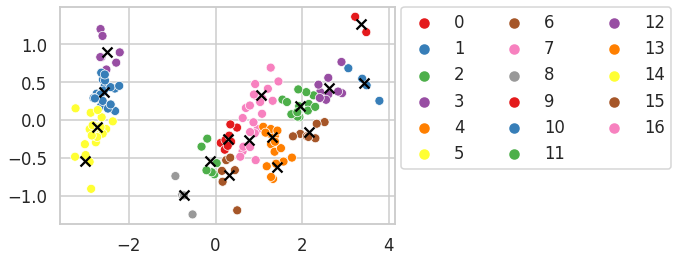

For 18 clusters, the average silhouette_score is : 0.381685013629653 , the destortion function is : 0.19194278974765044 ,and inertia is : 7.035274813045853


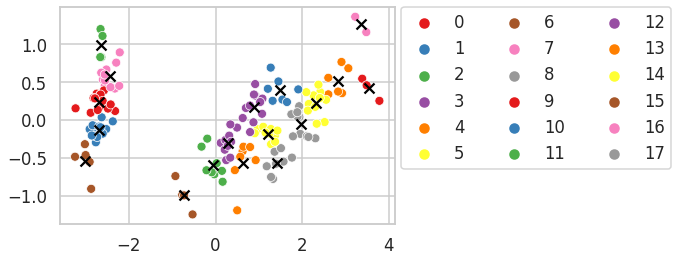

For 19 clusters, the average silhouette_score is : 0.38935402378385275 , the destortion function is : 0.1880739881463489 ,and inertia is : 6.663485610218588


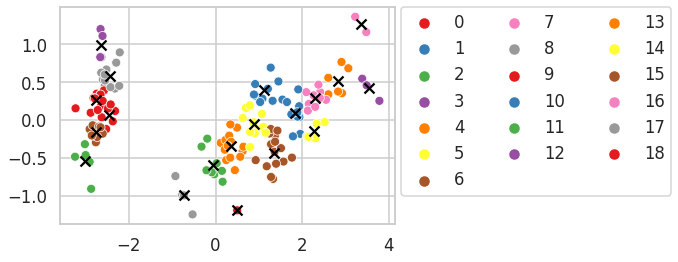

For 20 clusters, the average silhouette_score is : 0.38788083013610497 , the destortion function is : 0.17788578024785248 ,and inertia is : 6.187336266489293


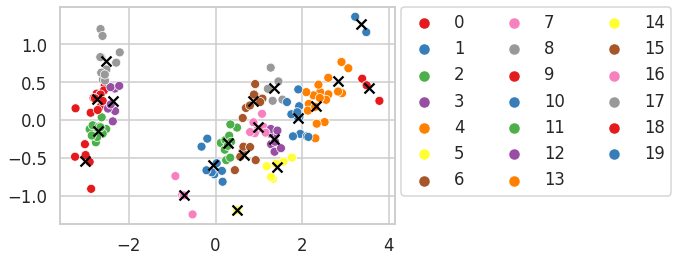

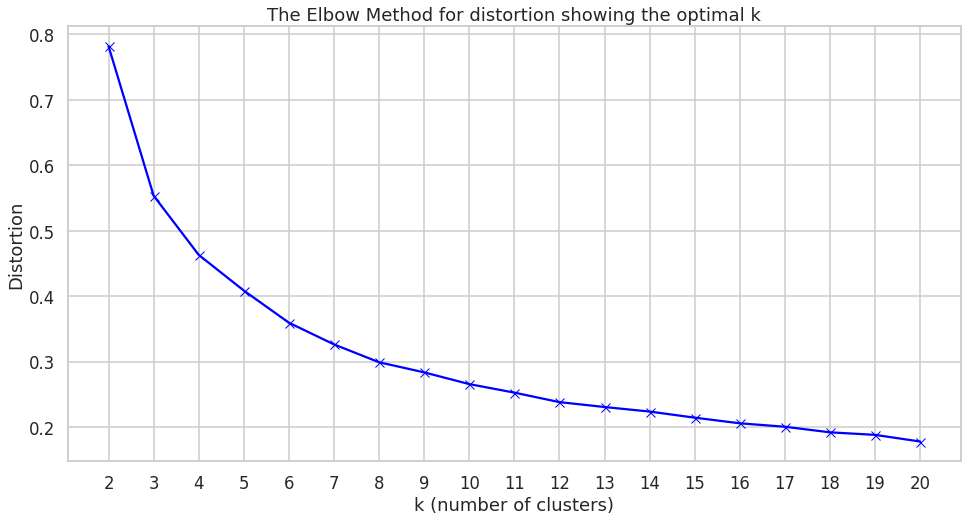

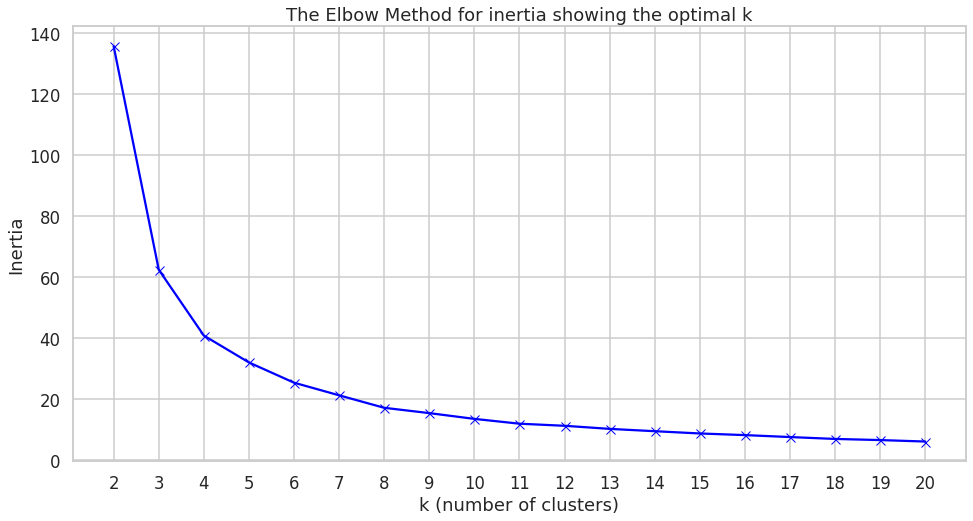

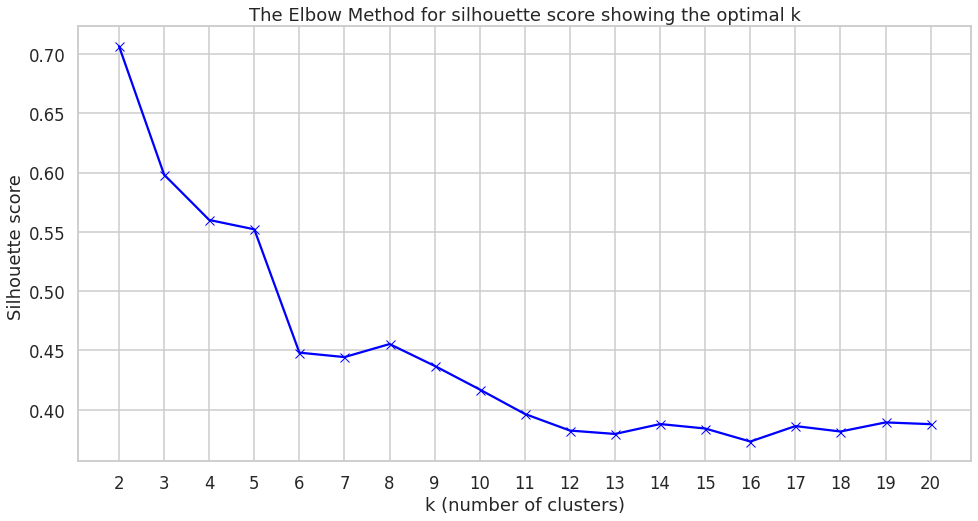

In [41]:
K_mean(transformed)

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 